# Introduction to Tensorflow Workshop

## Build Your Deep Learning Model with Keras

In [0]:
# Import Useful Libraries

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
import matplotlib.pyplot as plt

# check tensorflow version
print('Tensorflow Version: ', tf.__version__)

Tensorflow Version:  1.12.0


Using TensorFlow backend.


![Fashion-MNIST Dataset](https://tensorflow.org/images/fashion-mnist-sprite.png?hl=zh-cn)

In [0]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('Shape of train_images:', train_images.shape)
print('Shape of train_labels:', train_labels.shape)
print('Shape of test_images:', test_images.shape)
print('Shape of test_labels:', test_labels.shape)

4423680/4422102 [==============================] - 0s 0us/step
Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000,)


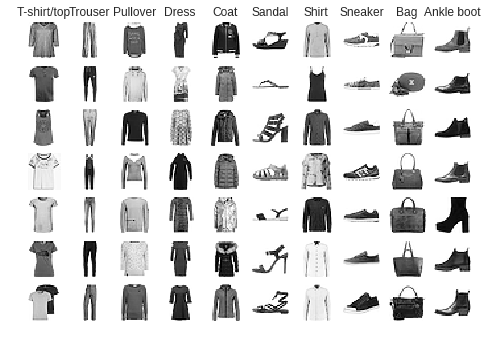

In [0]:
# Visualize Some data
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(train_labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(train_images[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [0]:
# Do some simple Preprocessing
# Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# convert labels to one-hot
train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

print('Shape of train_images:', train_images.shape)
print('Shape of train_labels:', train_labels.shape)
print('Shape of test_images:', test_images.shape)
print('Shape of test_labels:', test_labels.shape)

Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000, 10)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000, 10)


In [0]:
# build model
# ! Important: must define the input shape in the first layer
model_MLP = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28,)),
    keras.layers.Dense(128, input_shape = (train_images.shape[1],), activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')]
)
model_MLP.add(keras.layers.Dense(128, input_shape = (train_images.shape[1],), activation = 'relu'))
model_MLP.add(keras.layers.Dense(10, activation = 'softmax'))
model_MLP.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
                 metrics = ['accuracy'])
print(model_MLP.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 104,468
Trainable params: 104,468
Non-trainable params: 0
_________________________________________________________________
None


relu(XW + b)

In [0]:

# train the model
model_MLP.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels), batch_size = 32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.9655 - acc: 0.6039 - val_loss: 0.6389 - val_acc: 0.7384
Epoch 2/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.4622 - acc: 0.8365 - val_loss: 0.4549 - val_acc: 0.8367
Epoch 3/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.3934 - acc: 0.8615 - val_loss: 0.4140 - val_acc: 0.8568
Epoch 4/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.3615 - acc: 0.8720 - val_loss: 0.3929 - val_acc: 0.8626
Epoch 5/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.3353 - acc: 0.8798 - val_loss: 0.3877 - val_acc: 0.8600
Epoch 6/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.3199 - acc: 0.8861 - val_loss: 0.3788 - val_acc: 0.8666
Epoch 7/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.3043 - acc: 0.8895 - val_loss: 0.

In [0]:
# reshpe 
train_images = np.reshape(train_images, (train_images.shape[0], 28,28, 1))
test_images = np.reshape(test_images, (test_images.shape[0],28,28, 1))

In [0]:
# Build a CNN model
# first cnn layer
model_cnn = tf.keras.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 2,
                                    padding = 'same', activation = 'relu',
                                     input_shape = (28,28,1)))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
model_cnn.add(tf.keras.layers.Dropout(0.3))

# second cnn layer
model_cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 2,
                                    padding = 'same', activation = 'relu'))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
model_cnn.add(tf.keras.layers.Dropout(0.3))

# add FC layer
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(256, activation = 'relu'))
model_cnn.add(tf.keras.layers.Dropout(0.5))

# output layer
model_cnn.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model_cnn.summary()

model_cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
                 metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

In [0]:

model_cnn.fit(train_images, train_labels, batch_size = 64, epochs = 10,
             validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.5799 - acc: 0.7873 - val_loss: 0.3790 - val_acc: 0.8625
Epoch 2/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.4013 - acc: 0.8550 - val_loss: 0.3372 - val_acc: 0.8783
Epoch 3/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.3549 - acc: 0.8696 - val_loss: 0.3064 - val_acc: 0.8901
Epoch 4/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.3293 - acc: 0.8789 - val_loss: 0.2941 - val_acc: 0.8933
Epoch 5/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.3131 - acc: 0.8841 - val_loss: 0.2751 - val_acc: 0.8982
Epoch 6/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.2965 - acc: 0.8906 - val_loss: 0.2626 - val_acc: 0.8997
Epoch 7/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.2845 - acc: 0.8952 - val_loss: 0.

In [0]:
# Reimplement it using funcitonal api

from tensorflow.keras.models import Model

# Input layer
inputs = tf.keras.layers.Input(shape = (28,28,1,))
# first convolution layer
conv1 = tf.keras.layers.Conv2D(filters = 64, kernel_size = 2,
                                    padding = 'same', activation = 'relu')(inputs)
max_pool1 = tf.keras.layers.MaxPooling2D(pool_size = 2)(conv1)
dropout1 = tf.keras.layers.Dropout(0.3)(max_pool1)
conv2 = tf.keras.layers.Conv2D(filters = 32, kernel_size = 2,
                                    padding = 'same', activation = 'relu')(dropout1)
max_pool2 = tf.keras.layers.MaxPooling2D(pool_size = 2)(conv2)
dropout2 = tf.keras.layers.Dropout(0.3)(max_pool2)
flat1 = tf.keras.layers.Flatten()(dropout2)
fc1 = tf.keras.layers.Dense(256, activation = 'relu')(flat1)
dropout3 = tf.keras.layers.Dropout(0.5)(fc1)
outputs = tf.keras.layers.Dense(10,activation = 'softmax')(dropout3)

# build model and compile
model_cnn_fun = Model(inputs = inputs, outputs = outputs)
model_cnn_fun.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
                 metrics=['accuracy'])
model_cnn_fun.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 32)          0         
__________

In [0]:
model_cnn_fun.fit(train_images, train_labels, batch_size = 64, epochs = 10,
             validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.5932 - acc: 0.7829 - val_loss: 0.3971 - val_acc: 0.8535
Epoch 2/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.4113 - acc: 0.8514 - val_loss: 0.3338 - val_acc: 0.8802
Epoch 3/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.3670 - acc: 0.8662 - val_loss: 0.3088 - val_acc: 0.8869
Epoch 4/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.3393 - acc: 0.8760 - val_loss: 0.3084 - val_acc: 0.8856
Epoch 5/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.3221 - acc: 0.8830 - val_loss: 0.2747 - val_acc: 0.8992
Epoch 6/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.3050 - acc: 0.8878 - val_loss: 0.2745 - val_acc: 0.8981
Epoch 7/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.2948 - acc: 0.8928 - val_loss: 0.